In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


## Link Kaggle : https://www.kaggle.com/jayzainab/tugas-5-sc

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Read Data

In [3]:
df_customers = pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')
df_order_items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('../input/brazilian-ecommerce/olist_order_payments_dataset.csv')
df_orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')

# Merge Data

In [4]:
df_temp = df_orders.merge(df_customers, on = 'customer_id')
df_temp = df_temp.merge(df_order_payments, on = 'order_id')
df_temp = df_temp.merge(df_order_items, on = 'order_id')
df_temp.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


# Future Engineering

In [5]:
# MENGUBAH KE DATETIME

df_temp['order_delivered_customer_date'] = pd.to_datetime(df_temp['order_delivered_customer_date'], format = '%Y-%m-%d %H:%M:%S')
df_temp['order_purchase_timestamp'] = pd.to_datetime(df_temp['order_purchase_timestamp'], format = '%Y-%m-%d %H:%M:%S')
df_temp['order_approved_at'] = pd.to_datetime(df_temp['order_approved_at'], format = '%Y-%m-%d %H:%M:%S')
df_temp['order_delivered_carrier_date'] = pd.to_datetime(df_temp['order_delivered_carrier_date'], format = '%Y-%m-%d %H:%M:%S')
df_temp['order_estimated_delivery_date'] = pd.to_datetime(df_temp['order_estimated_delivery_date'], format = '%Y-%m-%d %H:%M:%S')

In [6]:
# Membuat feature berapa hari sejak pembelian terakhir oleh customer

df_recency= df_temp.groupby('customer_id')['order_approved_at'].max().reset_index()
df_recency = df_recency.rename({'order_approved_at':'most_recent'},axis = 1)
df_recency['most_recent'] = pd.to_datetime(df_recency.most_recent).dt.tz_localize(None)
df_recency.head()

,customer_id,most_recent
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19


In [7]:
df_recency['recency'] = (df_recency['most_recent'].max() - df_recency['most_recent']).dt.days
df_recency.head()

,customer_id,most_recent,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,293.0
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,414.0
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,552.0
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,382.0
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,152.0


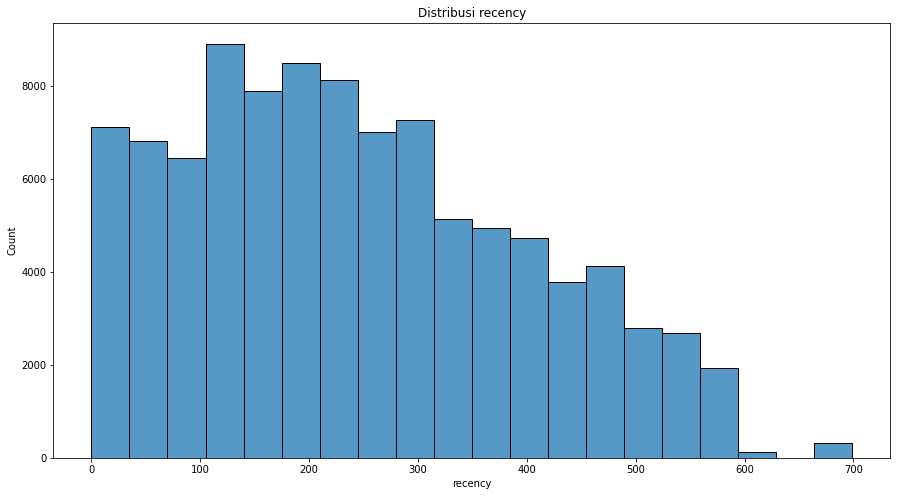

In [8]:
# plotting distribusi recency

plt.figure(figsize=(15,8))
sns.histplot(x='recency', data=df_recency, bins=20)
plt.title('Distribusi recency')
plt.xlabel('recency')
plt.show()


In [9]:
df_temp = df_temp.merge(df_recency, on = 'customer_id')
df_temp.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,most_recent,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-26 03:24:27,39.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-08 08:55:23,26.0


In [10]:
# Membuat kolom customer yang melakukan pembelian kembali (Frequency)

df_frequency = df_temp[['order_approved_at','customer_id']].groupby('customer_id').count()
df_frequency.rename(columns={'order_approved_at':'frequency'}, inplace=True)
df_frequency.head()

,frequency
customer_id,
00012a2ce6f8dcda20d059ce98491703,1
000161a058600d5901f007fab4c27140,1
0001fd6190edaaf884bcaf3d49edf079,1
0002414f95344307404f0ace7a26f1d5,1
000379cdec625522490c315e70c7a9fb,1


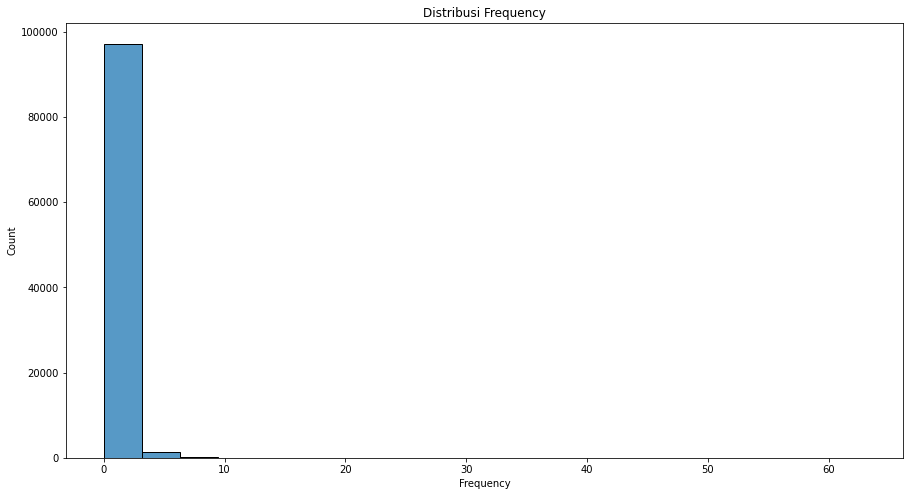

In [11]:
# plotting distribusi frequency

plt.figure(figsize=(15,8))
sns.histplot(x='frequency', data=df_frequency, bins=20)
plt.title('Distribusi Frequency')
plt.xlabel('Frequency')
plt.show()

In [12]:
df_temp = df_temp.merge(df_frequency, on = 'customer_id')
df_temp.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,most_recent,recency,frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0,3
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0,3
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0,3
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-26 03:24:27,39.0,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-08 08:55:23,26.0,1


In [13]:
# Membuat kolom pembelian tiap customer (Monetary)

df_monetary = df_temp.groupby('customer_id')['payment_value'].sum().reset_index()
df_monetary = df_monetary.rename({'payment_value':'monetary'},axis = 1)
df_monetary.head()

,customer_id,monetary
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


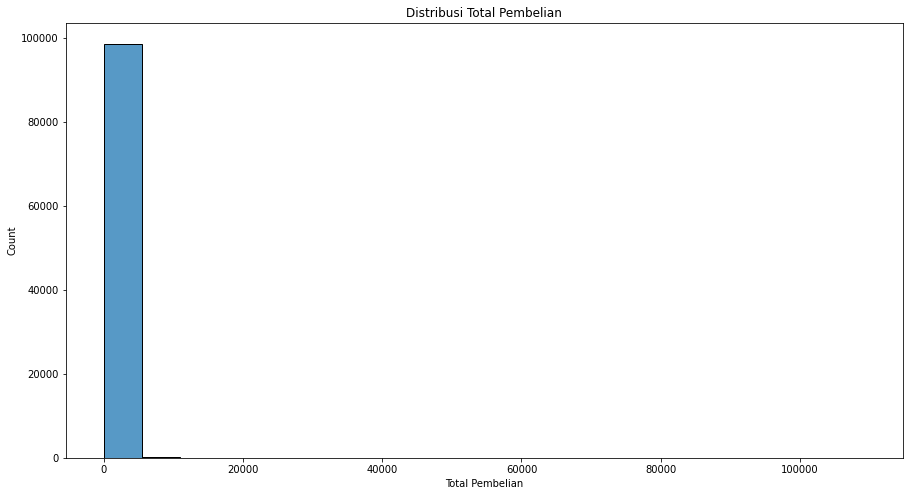

In [14]:
# plotting distribusi total purchase

plt.figure(figsize=(15,8))
sns.histplot(x='monetary', data=df_monetary, bins=20)
plt.title('Distribusi Total Pembelian')
plt.xlabel('Total Pembelian')
plt.show()

In [15]:
df_temp = df_temp.merge(df_monetary, on = 'customer_id')
df_temp.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,most_recent,recency,frequency,monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0,3,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0,3,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0,3,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-26 03:24:27,39.0,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-08 08:55:23,26.0,1,179.12


# Finding Churn Customer

In [16]:
# Membuat kolom churn : 365 Hari sejak pembelian terakhir tidak order lagi

df_temp['is_churn'] = df_temp['recency'].apply(lambda x: True if x >= 365 else False)
df_temp['is_churn'].value_counts()
df_temp.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_id,seller_id,shipping_limit_date,price,freight_value,most_recent,recency,frequency,monetary,is_churn
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0,3,38.71,False
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0,3,38.71,False
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 11:07:15,336.0,3,38.71,False
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-26 03:24:27,39.0,1,141.46,False
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-08 08:55:23,26.0,1,179.12,False


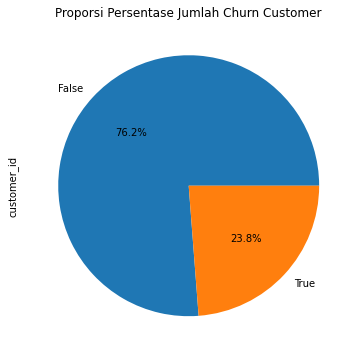

In [17]:
df_churn = df_temp.groupby(['is_churn'])['customer_id'].count()

plt.figure(figsize=(10,6))
plt.title('Proporsi Persentase Jumlah Churn Customer')

df_churn.plot.pie(autopct='%1.1f%%')
plt.show()

# Handling Missing Value

In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   customer_id                    117601 non-null  object        
 2   order_status                   117601 non-null  object        
 3   order_purchase_timestamp       117601 non-null  datetime64[ns]
 4   order_approved_at              117586 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116356 non-null  datetime64[ns]
 6   order_delivered_customer_date  115034 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117601 non-null  datetime64[ns]
 8   customer_unique_id             117601 non-null  object        
 9   customer_zip_code_prefix       117601 non-null  int64         
 10  customer_city                  117601 non-null  object        
 11  

In [19]:
# Mengisi Missing Value  Recency dengan Mean

df_temp.recency = df_temp.recency.fillna(df_temp.recency.mean())

In [20]:
df_temp['order_approved_at'].fillna(df_temp['order_approved_at'].mode()[0], inplace=True)
df_temp['order_delivered_carrier_date'].fillna(df_temp['order_delivered_carrier_date'].mode()[0], inplace=True)
df_temp['order_delivered_customer_date'].fillna(df_temp['order_delivered_customer_date'].mode()[0], inplace=True)
df_temp['most_recent'].fillna(df_temp['most_recent'].mode()[0], inplace=True)

# Encoding

In [21]:
# Menentukan kolom berdasarkan Categoric dan Numeric
kolom_categoric = [column for column, is_type in (df_temp.dtypes=="object").items() if is_type]
kolom_numeric = [c for c in df_temp.columns if df_temp[c].dtype in ['int64', 'float64']]

In [22]:
kolom_categoric

['order_id',
 'customer_id',
 'order_status',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'payment_type',
 'product_id',
 'seller_id',
 'shipping_limit_date']

In [23]:
kolom_numeric

['customer_zip_code_prefix',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'order_item_id',
 'price',
 'freight_value',
 'recency',
 'frequency',
 'monetary']

In [24]:
# Melihat Frequency Unique Values di Masing Masing Kolom
for nama_kolom in df_temp.columns:
    print(f"----------- {nama_kolom} ----------- \n")
    print(df_temp[nama_kolom].value_counts())

----------- order_id ----------- 

895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
a3725dfe487d359b5be08cac48b64ec5    24
                                    ..
f2b0b1751d796ee3bf5df90cb7c1c213     1
2eadb8e36b6d6465dc9e2e3f3b95751d     1
1373f8a3742861c26892cc2aab7c41e1     1
1e6df4ea0f78bcf1e9e1a3abf97f28e1     1
66dea50a8b16d9b4dee7af250b4be1a5     1
Name: order_id, Length: 98665, dtype: int64
----------- customer_id ----------- 

270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
d22f25a9fadfb1abbc2e29395b1239f4    24
                                    ..
fc329f76b6bbfcdb6faafd1ec6c2dcc2     1
a71faac9f56802e89e3ae192fd53f1af     1
630b189fb0c73900cf3360c4a795680e     1
462903f7a882d16b16e174dfec5aece4     1
edb027a75a1449115f6b43211ae02a24     1
Name: customer_id, Length

In [25]:
# Label Encoding Kolom Payment Type
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_temp['payment_type'] = labelencoder.fit_transform(df_temp['payment_type'])

In [26]:
# Label Encoding Kolom Customer_city
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_temp['customer_city'] = labelencoder.fit_transform(df_temp['customer_city'])

In [27]:
# Drop Columns
df_temp.drop(columns=['order_id', 'customer_id', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'customer_zip_code_prefix', 'order_estimated_delivery_date', 'customer_unique_id', 'seller_id', 'payment_sequential', 'order_purchase_timestamp', 'customer_state', 'order_approved_at', 'order_status', 'payment_installments', 'order_item_id', 'product_id', 'shipping_limit_date', 'payment_value', 'freight_value', 'most_recent'], inplace = True)
df_temp

,customer_city,payment_type,price,recency,frequency,monetary,is_churn
0,3588,1,29.99,336.0,3,38.71,False
1,3588,3,29.99,336.0,3,38.71,False
2,3588,3,29.99,336.0,3,38.71,False
3,417,0,118.70,39.0,1,141.46,False
4,4041,1,159.90,26.0,1,179.12,False
...,...,...,...,...,...,...,...
117596,2995,1,174.90,209.0,1,195.00,False
117597,2537,1,205.99,372.0,1,271.01,True
117598,1928,1,179.99,237.0,2,882.32,False
117599,1928,1,179.99,237.0,2,882.32,False


# Outlier

<AxesSubplot:>

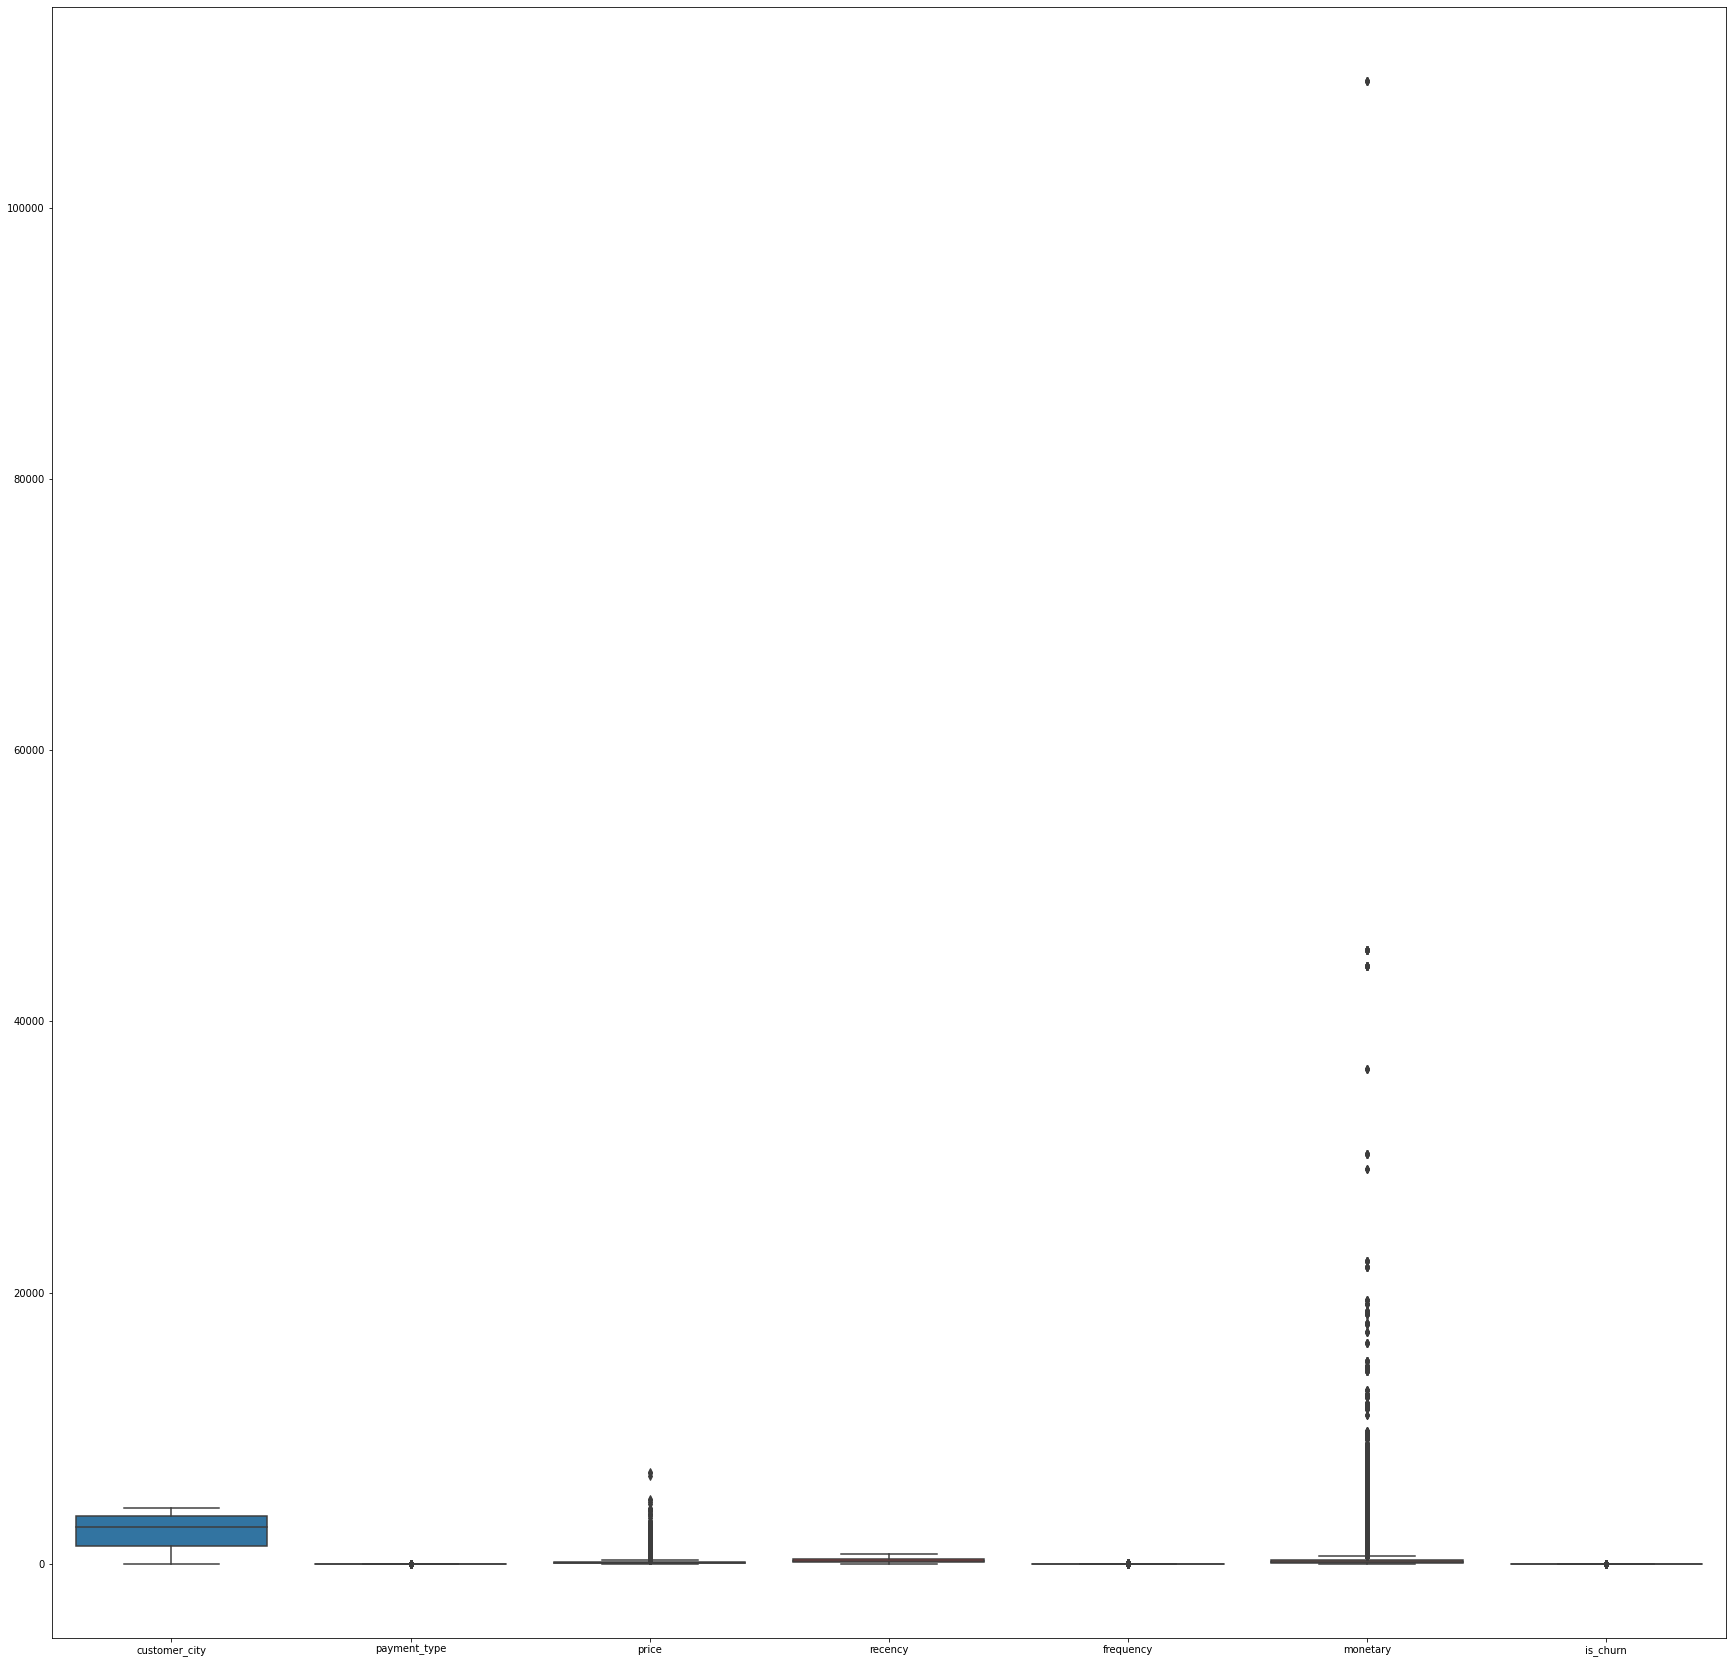

In [28]:
# Cek outlier Box Plot

fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df_temp)

In [29]:
# Z-Score
columns = ['monetary', 'price']

for i in columns:
    upper_limit = df_temp[i].mean() + 3*df_temp[i].std()
    lower_limit = df_temp[i].mean() - 3*df_temp[i].std()

    df_temp[i] = np.where(
        df_temp[i]>upper_limit,
        upper_limit,
        np.where(
            df_temp[i]<lower_limit,
            lower_limit,
            df_temp[i]
        )
    )

<AxesSubplot:>

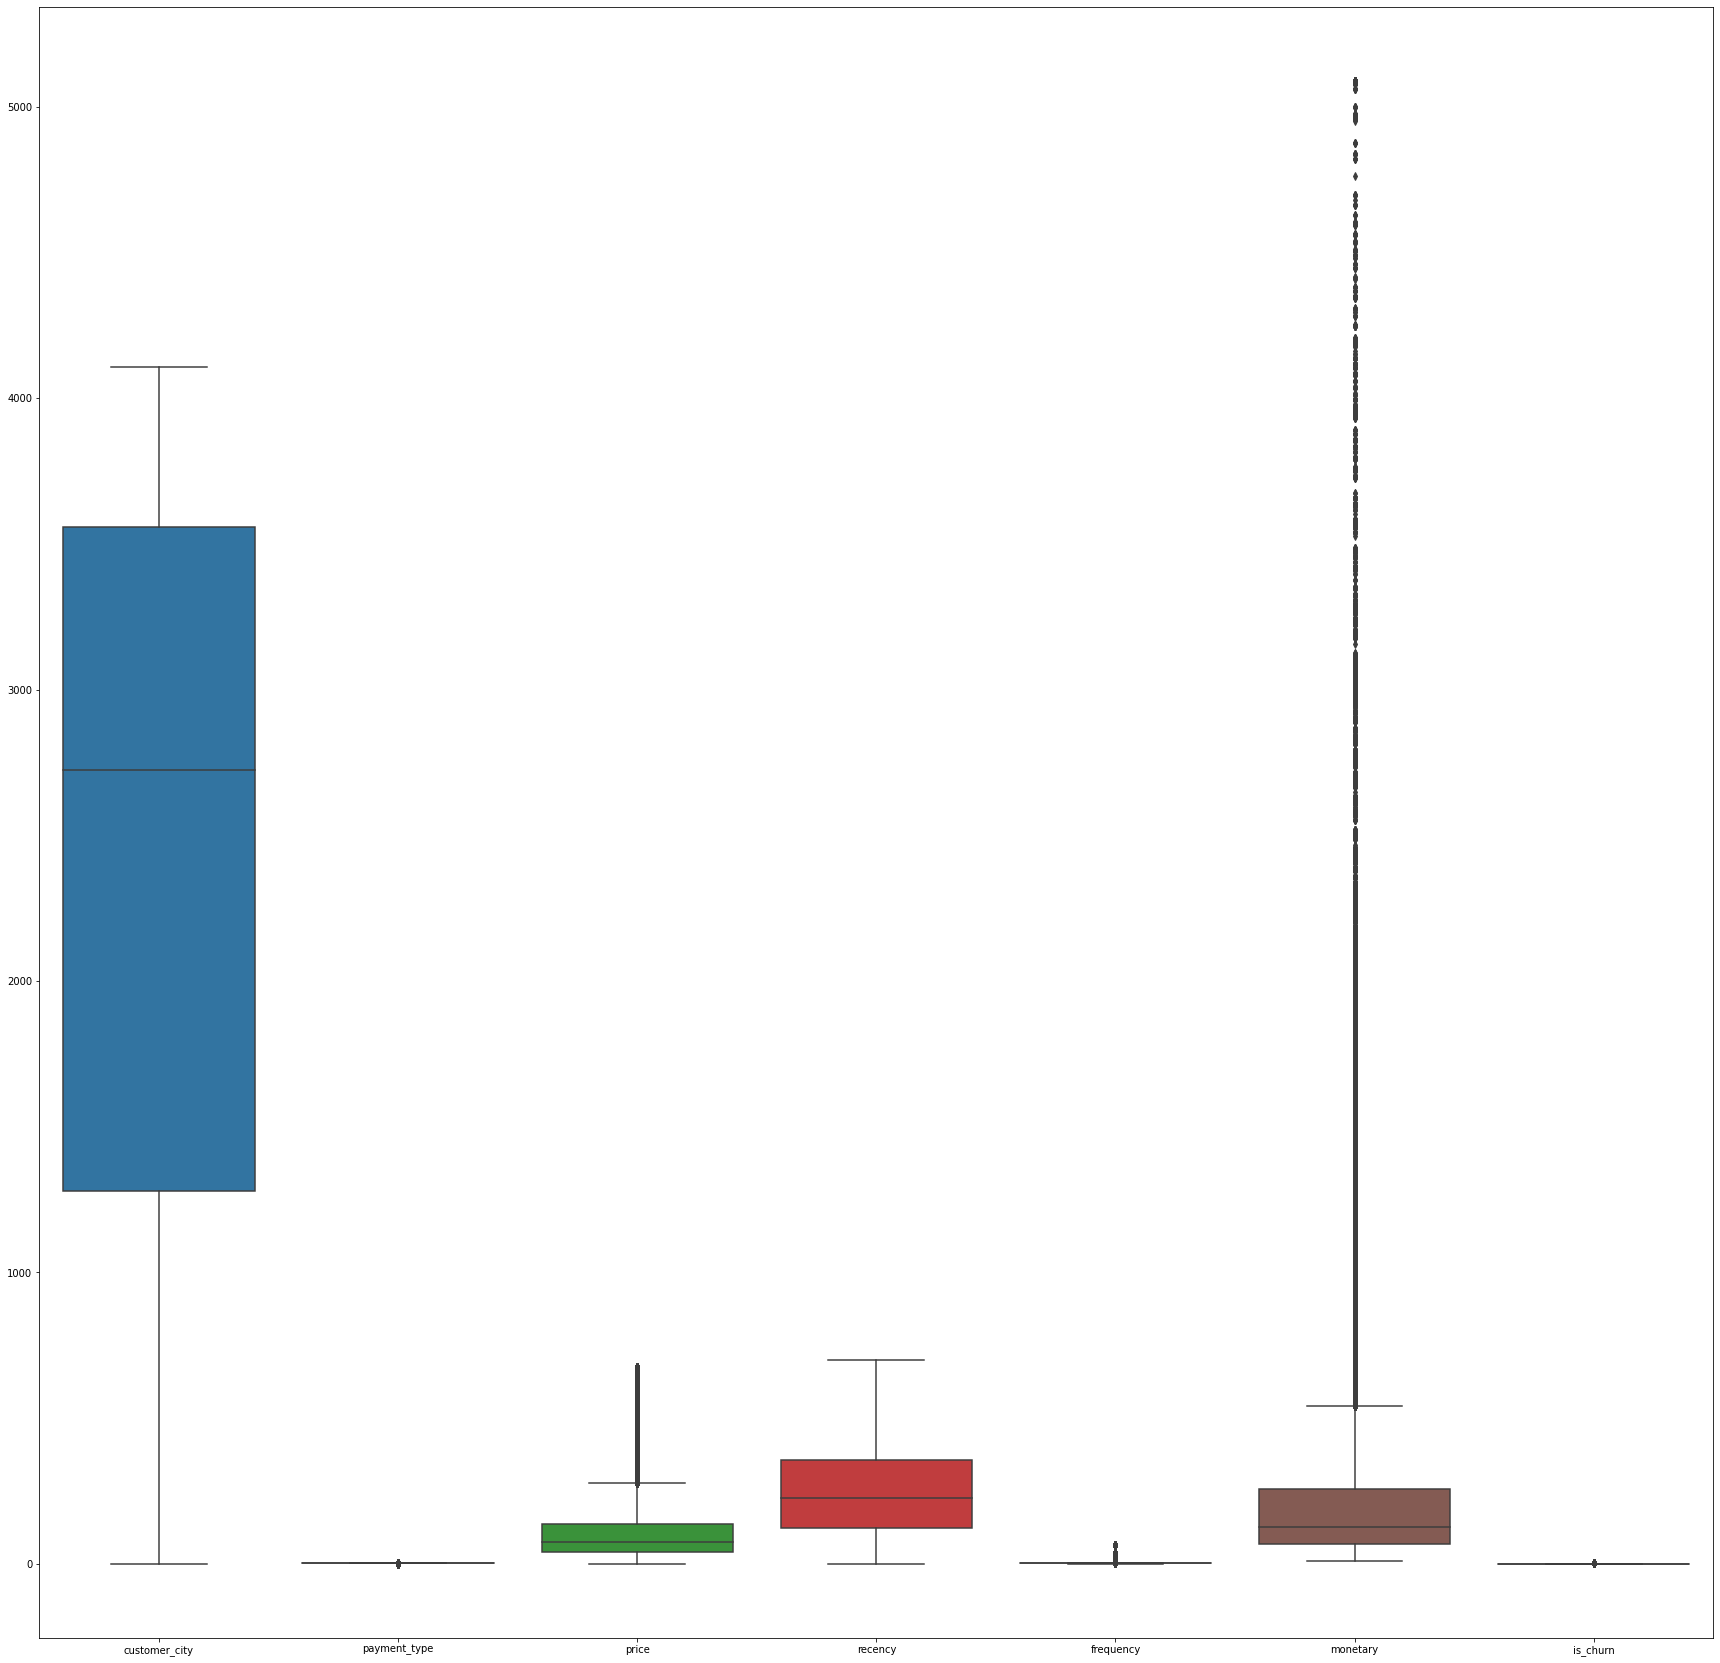

In [30]:
# Cek Kembali Outlier Box Plot yang telah dibuang outliernya menggunakan Z-Score
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df_temp)

# Cek Data Balnce atau Tidak

<AxesSubplot:xlabel='is_churn', ylabel='count'>

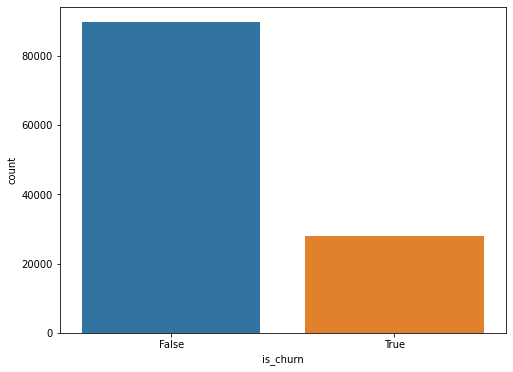

In [31]:
# Imbalance Data

# Observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(df_temp.is_churn)

# Korelasi

<AxesSubplot:>

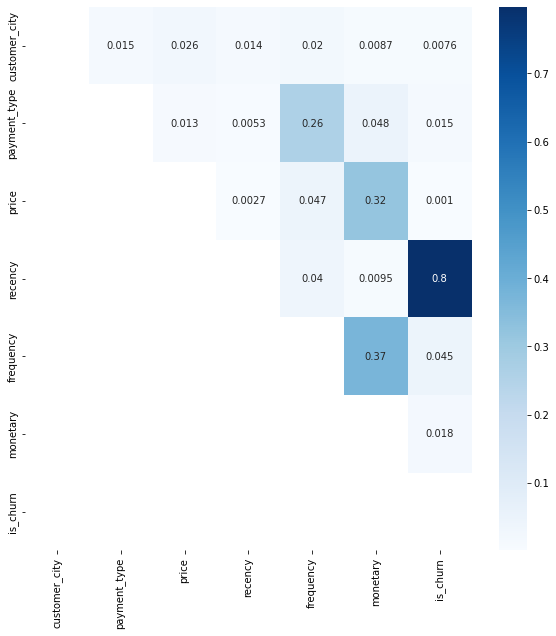

In [32]:
# Create correlation matrix
corr_matrix = df_temp.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

# Memisahkan X dan y

In [33]:
# Memisahkan mana X dan mana y
y= df_temp['is_churn']
X= df_temp.drop(['is_churn'],1)
X.head()

,customer_city,payment_type,price,recency,frequency,monetary
0,3588,1,29.99,336.0,3,38.71
1,3588,3,29.99,336.0,3,38.71
2,3588,3,29.99,336.0,3,38.71
3,417,0,118.70,39.0,1,141.46
4,4041,1,159.90,26.0,1,179.12


In [34]:
y

0         False
1         False
2         False
3         False
4         False
          ...  
117596    False
117597     True
117598    False
117599    False
117600    False
Name: is_churn, Length: 117601, dtype: bool

# Base Line Model

In [35]:
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [36]:
#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

In [37]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [38]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 5
DecisionTreeClassifier Acc Test: [1.0], 1 of KFold 5
DecisionTreeClassifier Recall: [1.0], 1 of KFold 5
DecisionTreeClassifier Precission: [1.0], 1 of KFold 5
DecisionTreeClassifier AUC: [1.0], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 5
DecisionTreeClassifier Acc Test: [1.0], 2 of KFold 5
DecisionTreeClassifier Recall: [1.0], 2 of KFold 5
DecisionTreeClassifier Precission: [1.0], 2 of KFold 5
DecisionTreeClassifier AUC: [1.0], 2 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: 

In [39]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
0,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,XGBClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,ExtraTreesClassifier,1.000000,0.999813,0.999714,0.999500,0.999705,0.000187
4,SVC,0.998180,0.998129,0.999245,0.992886,0.996326,0.000051
2,KNeighborsClassifier,0.994426,0.989260,0.982029,0.972653,0.983548,0.005166
3,GaussianNB,0.967749,0.967857,0.970043,0.892436,0.941917,0.000108
1,LogisticRegression,0.957860,0.957960,0.902356,0.924786,0.946550,0.000100
5,LinearSVC,0.908779,0.909056,0.810469,0.926576,0.915082,0.000278


# Hyperparamater Tunning, GridSearchCV

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [42]:
#Grid Search


model = LogisticRegression()

param = dict()
param['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
param['C'] = [0.00001, 0.0001, 0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20, 100]

cv = StratifiedKFold(n_splits=5)
clf1 = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clf1.fit(X,y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/py

[CV 2/5] END C=1e-05, penalty=none, solver=newton-cg;, score=1.000 total time=   6.7s
[CV 3/5] END C=1e-05, penalty=none, solver=lbfgs;, score=0.973 total time=   1.1s
[CV 1/5] END C=1e-05, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1e-05, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1e-05, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1e-05, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1e-05, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1e-05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1e-05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1e-05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1e-05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1e-05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[C

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

[CV 1/5] END C=1e-05, penalty=none, solver=newton-cg;, score=0.998 total time=   6.7s
[CV 2/5] END C=1e-05, penalty=none, solver=lbfgs;, score=0.997 total time=   1.2s
[CV 5/5] END C=1e-05, penalty=none, solver=lbfgs;, score=0.929 total time=   1.2s
[CV 4/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.782 total time=   0.4s
[CV 2/5] END C=1e-05, penalty=l2, solver=newton-cg;, score=1.000 total time=   7.0s
[CV 2/5] END .C=1e-05, penalty=l2, solver=lbfgs;, score=1.000 total time=   1.2s
[CV 4/5] END .C=1e-05, penalty=l2, solver=lbfgs;, score=0.944 total time=   1.1s
[CV 1/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.810 total time=   0.6s
[CV 2/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.802 total time=   0.5s
[CV 5/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.805 total time=   0.5s
[CV 5/5] END C=1e-05, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1e-05, penalty=elasticnet, solver=liblinear;, score=nan total time=

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

[CV 3/5] END C=1e-05, penalty=none, solver=newton-cg;, score=0.999 total time=   6.3s
[CV 1/5] END C=1e-05, penalty=none, solver=lbfgs;, score=0.975 total time=   1.2s
[CV 4/5] END C=1e-05, penalty=none, solver=lbfgs;, score=0.991 total time=   1.2s
[CV 3/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.788 total time=   0.4s
[CV 1/5] END C=1e-05, penalty=l2, solver=newton-cg;, score=0.999 total time=   6.6s
[CV 5/5] END C=1e-05, penalty=l2, solver=newton-cg;, score=0.999 total time=   6.7s
[CV 4/5] END C=0.0001, penalty=none, solver=newton-cg;, score=0.995 total time=   6.3s
[CV 5/5] END C=0.0001, penalty=none, solver=lbfgs;, score=0.929 total time=   1.2s
[CV 5/5] END C=0.0001, penalty=l1, solver=liblinear;, score=0.793 total time=   0.4s
[CV 3/5] END C=0.0001, penalty=l2, solver=newton-cg;, score=1.000 total time=   6.2s
[CV 5/5] END C=0.0001, penalty=l2, solver=newton-cg;, score=0.998 total time=   6.3s
[CV 4/5] END C=0.001, penalty=none, solver=newton-cg;, score=0.995 total 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/py


[CV 2/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.998 total time=   7.2s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.998 total time=   6.1s
[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.999 total time=   6.8s
[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.961 total time=   4.1s
[CV 3/5] END C=0.03, penalty=none, solver=newton-cg;, score=0.999 total time=   6.5s
[CV 2/5] END C=

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 2/5] END C=0.005, penalty=l2, solver=liblinear;, score=0.955 total time=   2.2s
[CV 5/5] END C=0.005, penalty=l2, solver=liblinear;, score=0.972 total time=   3.5s
[CV 4/5] END C=0.01, penalty=none, solver=newton-cg;, score=0.995 total time=   6.4s
[CV 4/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.991 total time=   1.2s
[CV 3/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.998 total time=   7.3s
[CV 1/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.999 total time=   6.7s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.999 total time=   7.0s
[CV 4/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.966 total time=   1.8s
[CV 5/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.978 total time=   2.0s
[CV 4/5] END C=0.03, penalty=none, solver=newton-cg;, score=0.995 total time=   6.3s
[CV

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb


[CV 3/5] END C=0.3, penalty=l1, solver=liblinear;, score=1.000 total time=  36.3s
[CV 4/5] END C=0.3, penalty=l2, solver=newton-cg;, score=0.995 total time=   6.6s
[CV 5/5] END ...C=0.3, penalty=l2, solver=lbfgs;, score=0.989 total time=   1.1s
[CV 2/5] END C=0.3, penalty=l2, solver=liblinear;, score=0.994 total time=   2.5s
[CV 4/5] END C=0.3, penalty=l2, solver=liblinear;, score=0.986 total time=   1.8s
[CV 1/5] END C=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.3, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.3, penalty=elasticnet, solver=lbfgs;, score=nan t

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python


[CV 4/5] END ...C=2, penalty=none, solver=lbfgs;, score=0.991 total time=   1.2s
[CV 4/5] END .C=2, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ...C=2, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=2, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=2, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .......C=2, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=2, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .C=2, penalty=l1, solver=liblinear;, score=1.000 total time=  35.3s
[CV 3/5] END .C=2, penalty=l2, solver=newton-cg;, score=0.998 total time=   6.5s
[CV 1/5] END .....C=2, penalty=l2, solver=lbfgs;, score=0.992 total time=   1.2s
[CV 2/5] END .....C=2, penalty=l2, solver=lbfgs;, score=0.924 total time=   1.1s
[CV 4/5] END .....C=2, penalty=l2, solver=lbfgs;, score=0.950 total time=   1.2s
[CV 1/5] END .C=2, penalty=

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat


[CV 5/5] END .C=3, penalty=l1, solver=liblinear;, score=1.000 total time=  16.5s
[CV 1/5] END C=3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=3, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=3, penalty=elasticnet, solver=liblinear;, score=nan total t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.003, 0.005, 0.01, 0.03,
                               0.05, 0.1, 0.3, 0.5, 1, 2, 3, 3, 4, 5, 10, 20,
                               100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=4)

In [43]:
print('Best Score: {}'.format(clf1.best_score_))
print('Best Hyperparameters: {}'.format(clf1.best_params_))

Best Score: 0.9999234711953742
Best Hyperparameters: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}


# Pisahin X, y jadi X_train, X_test, y_train, y_test

In [44]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [45]:
#Pisahin X, y jadi X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# menggunakan 0.15 karena jumlah data ribuan
print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (99960, 6)
y_train dataset shape:  (99960,)
X_test dataset shape:  (17641, 6)
y_test dataset shape:  (17641,)


# Buat Model Pakai Best Param Dari GridSearchCV

In [46]:
# Buat Model Pakai Best Param Dari GridSearchCV
modeltun = LogisticRegression(**clf1.best_params_)

# Melatih Model Pakai data train kita

In [47]:
# Melatih Model Pakai data train kita
model_fit = modeltun.fit(X_train,y_train)

# Cek Peforma Model di Data Latih

In [48]:
# Cek Peforma model kita di data latih
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     76170
        True       1.00      1.00      1.00     23790

    accuracy                           1.00     99960
   macro avg       1.00      1.00      1.00     99960
weighted avg       1.00      1.00      1.00     99960



# Cek Peforma Model di Data Test

In [49]:
# Cek Peforma model kita di data test
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     13457
        True       1.00      1.00      1.00      4184

    accuracy                           1.00     17641
   macro avg       1.00      1.00      1.00     17641
weighted avg       1.00      1.00      1.00     17641



Acurracy 1.00